## Churn Prediction in Banking Sector##

### Introduction
Customer churn rate based on the behavior of bank customers is one of the important key business metrics as it can help develop business strategies to reduce the cost. This project analyzes the behavior of bank customers who are more likely to leave the bank (or close the bank account). The model will utilize exploratory data analysis and some predictive analytics techniques to identify the potential customers that are likely to churn. As the project moves forward further analysis techniques and opportunities will be explored. The project has the following objectives - 
1. Predict the chances of any customer leaving the bank.
2. Identify and analyze the major indicators of a customer churn.
3. Develop strategies that can be used to minimize the customer churn rate.
The data for this analysis is taken from publicly available Kaggle database 

In [74]:
#Import dataset (the list will be expanded as the project moves forward!)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss


### Data Exploration
I begin data wrangling by reading in dataset (csv file) into pandas and displaying the column names along with their data types. Also I look in to the first few rows of the entire dataset.

In [75]:
dataset = pd.read_csv('https://raw.github.com/neupanebinod/Capstone-Project-II/master/Capstone-Project-II/Churn_Modelling.csv')
#Checking first five rows of the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Based on this, I can assume that CustomerId is a unique identifier, Exited is going to tell us whether the the customer churned or not churned.

In [2]:
#Checking column information
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

There are 14 columns/features in the dataset. 

In [3]:
#Checking statistical summary of numerical values
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The table above describes the statistical summary of the numerical variables. Based on this, I can assume that CustomerId is a unique identifier, Exited is going to tell us whether the the customer churned or not churned.

In [4]:
#Checking data types
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Gender, Geography, and Surname are categorical features whereas ther rest of all other features are numerical.

In [6]:
#Checking if any missing values are present
missing = pd.concat([dataset.isnull().sum(), 100 * dataset.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending= False)

,count,%
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


As seen in the output above there are no missing values in the dataset. 

In [7]:
dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
#Since we are interested in evaluating the churn rate, our target variable is 'Exited' 
#Check target variable information
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

The information above highlights that the target feature has imbalanced data (about 8000 records are not-chured or 0 while churned or 1 are just about 2000). This requires upsampling or balancing the data in the data preprocessing step. 

In [9]:
#Check categorical variables
dataset.select_dtypes('object')

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [10]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#Drop columns that are not important in the analysis
dataset = dataset.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Descriptive statistics of the final dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [13]:
#average of each features 
dataset.groupby("Exited").agg("mean")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [14]:
#Average age by gender
dataset.groupby("Gender").agg({"Age": "mean"})

,Age
Gender,
Female,39.238389
Male,38.658237


The average age of male and female is 38 and 39 years, respectively.

In [15]:
# Churn rate based on geography
dataset.groupby("Geography").agg({"Exited": "count"})

,Exited
Geography,
France,5014
Germany,2509
Spain,2477


In [16]:
# Number of both the churned and non-churned customers, grouped by active membership and credit card possession
dataset.groupby(["IsActiveMember", "HasCrCard"]).agg({"Exited" : "count"})

Exited
IsActiveMember HasCrCard        
0              0            1401
               1            3448
1              0            1544
               1            3607

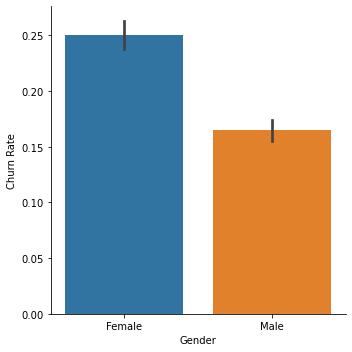

In [67]:
#Check Gender and Exit Rate
gender= sns.catplot(x = "Gender", y = "Exited", data = dataset, kind = "bar")
gender.set_ylabels("Churn Rate")
plt.show()

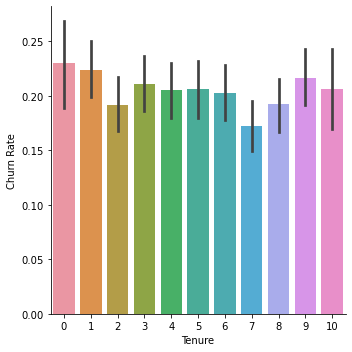

In [18]:
#Check Tenure and Exit Rate
tenure= sns.factorplot(x = "Tenure", y = "Exited", data = dataset, kind = "bar", size = 5)
tenure.set_ylabels("Churn Rate")
plt.show()

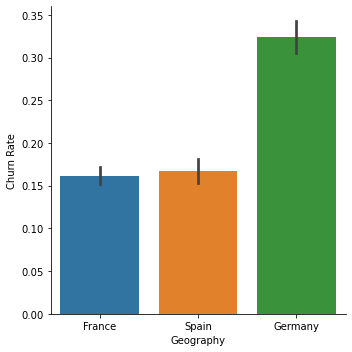

In [64]:
#Check Geography and Exit Rate
geography= sns.catplot(x = "Geography", y = "Exited", data = dataset, kind = "bar", height = 5)
geography.set_ylabels("Churn Rate")
plt.show()

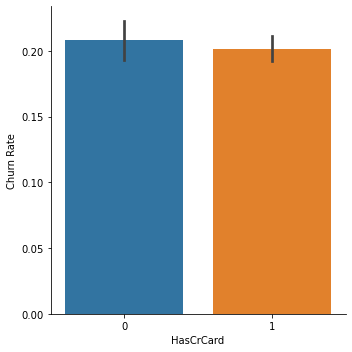

In [65]:
#Check HasCreditCard and Exit Rate
hascard= sns.catplot(x = "HasCrCard", y = "Exited", data = dataset, kind = "bar", height = 5)
hascard.set_ylabels("Churn Rate")
plt.show()

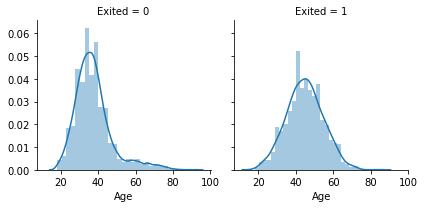

In [19]:
#Check Age and Exit Rate
age= sns.FacetGrid(dataset, col = "Exited")
age.map(sns.distplot, "Age", bins = 30)
plt.show()

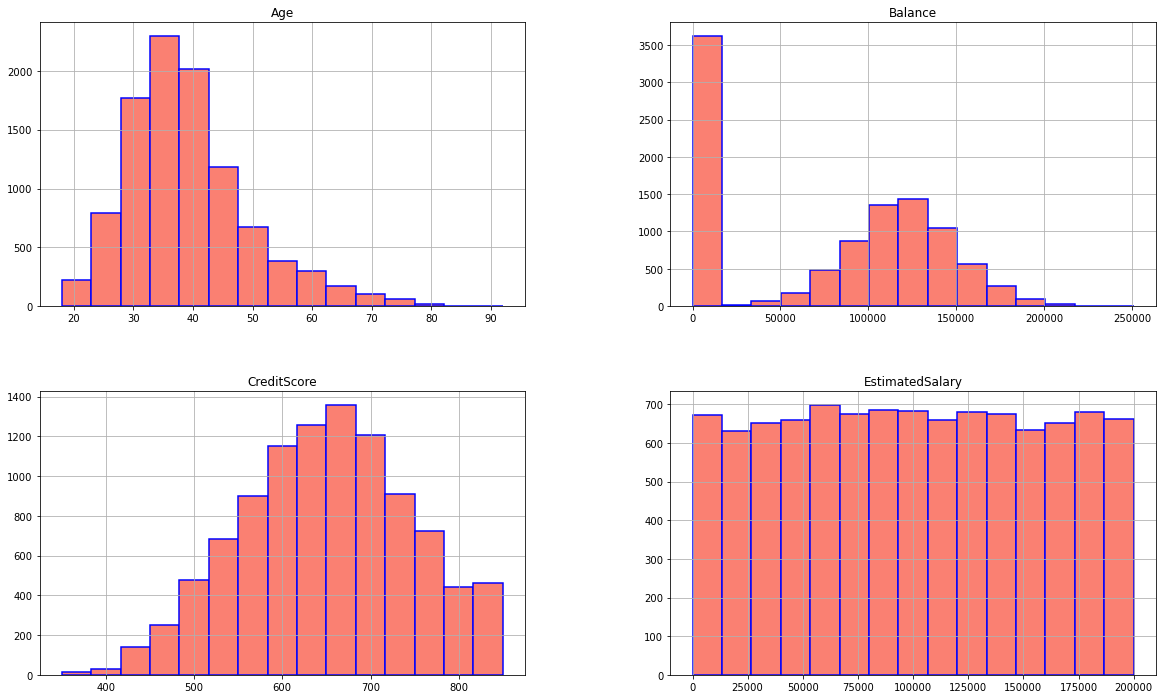

In [20]:
#Plot distribution of selected numerical features
distribution = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
dataset[distribution].hist(figsize = (20, 12), bins = 15, layout = (2, 2), 
                          color = 'salmon', edgecolor = 'blue', linewidth = 1.5);

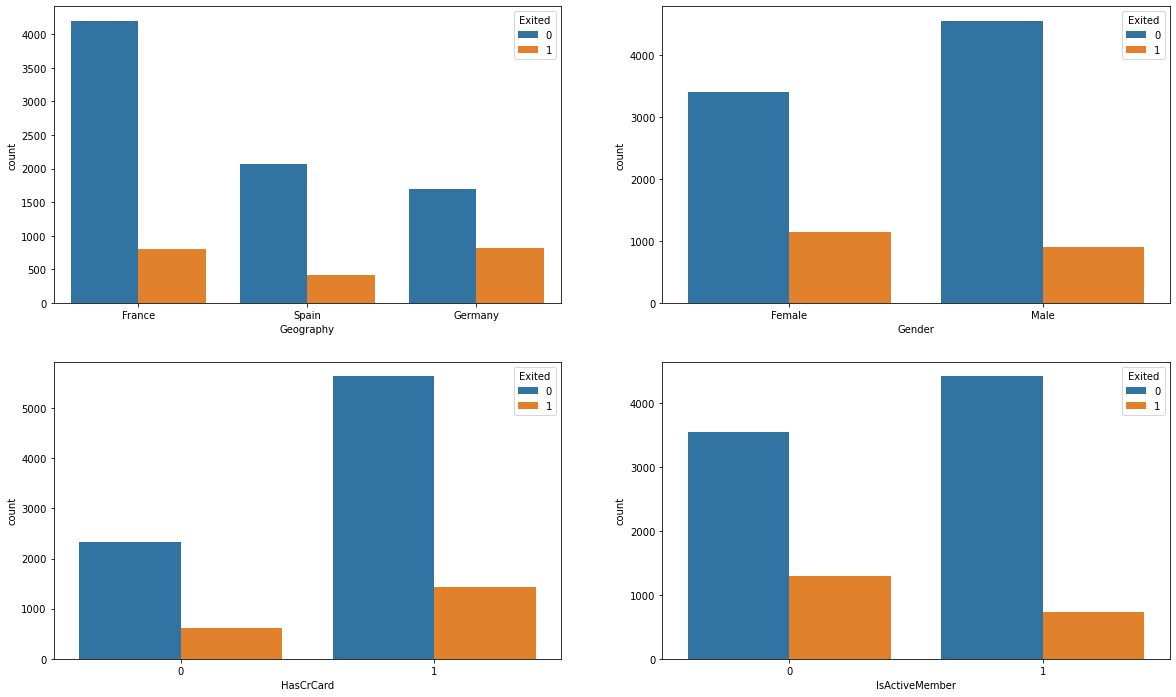

In [21]:
# Plotting categorical variables to visualize target variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

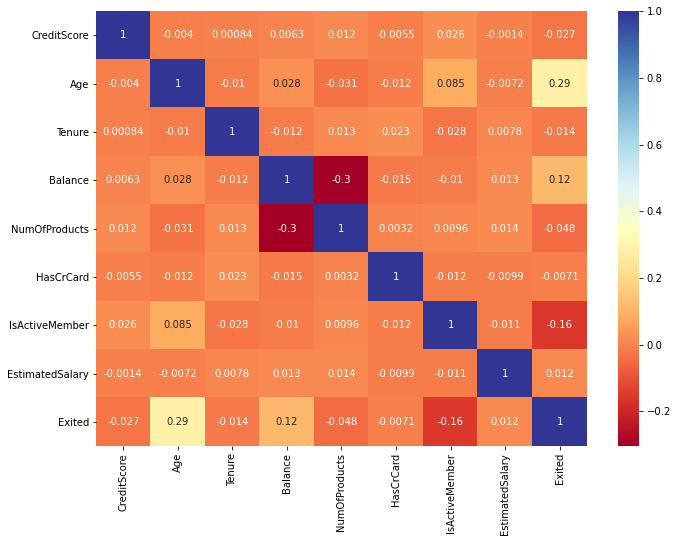

In [22]:
# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
plt.subplots(figsize=(11,8))
sns.heatmap(corr, annot=True, cmap="RdYlBu",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

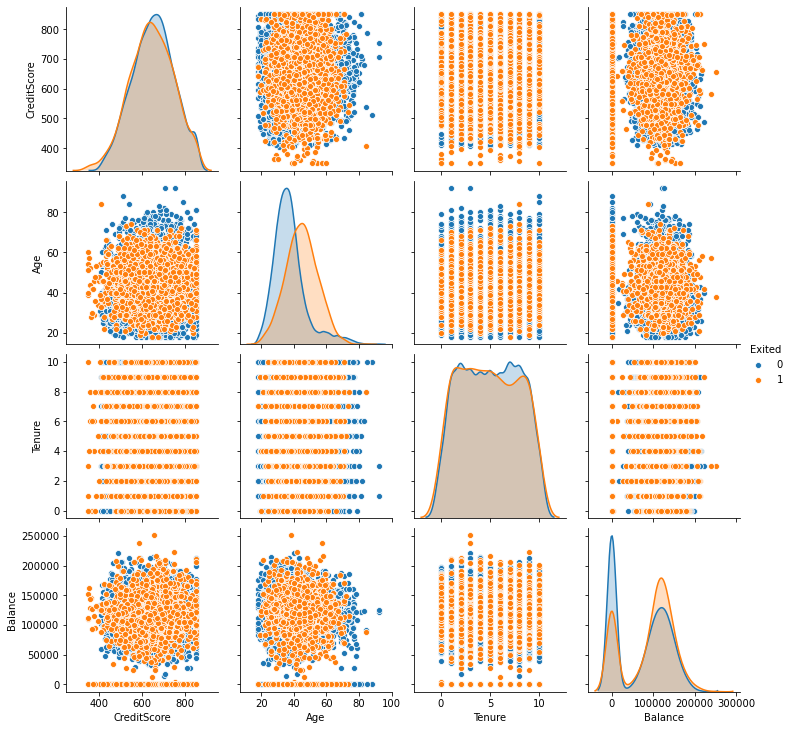

In [70]:
g = sns.pairplot(dataset, vars=['CreditScore', 'Age', 'Tenure', 'Balance'], hue='Exited')

Germany has the hightest churning rate (i.e., lowest percentage of non-exited customer and highest percentage of exited customer). Female have higher churning rate than male. Age group over 40 is likely to churn. Customers with high credit score tend to not churn.

### Data Processing
Data processing is a critical step after the EDA in order to prepare data for further exploration and
modelling. All categorical features were dummy-coded/encoded with one-hot encoding method
using get_dummies() method in pandas package to create features with one of the feature levels
dropped to avoid singularity in data. 

In [23]:
#Dummy coding categorical columns and dropping the first level
dataset1 = pd.get_dummies(data=dataset, columns=['Gender','Geography'], drop_first=True)
df= pd.concat([dataset, dataset1], axis=1)
df.drop(columns =['Gender', 'Geography'],axis=1, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
df.head(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [24]:
#Standarize numerical data using StandardScaler 
scaler = StandardScaler()
scl_columns = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts', 'EstimatedSalary']
df[scl_columns] = scaler.fit_transform(df[scl_columns])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1


In [25]:
df.shape

(10000, 12)

####Random Forest Model

In [26]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Data Modelling and Results
The target column Exited consisted of two classes (0 and 1). Since there was a target column to be predicted, this analysis is considered as supervised machine learning method. In this analysis, the class 1 in target was assumed to be converted customers exited and 0 as not exited. Original dataset was split into train and test sets with
30% of data allocated in test set.

In [27]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
X = df.drop('Exited',axis=1)#feature variables
y = df['Exited'] # target variable
X_features = X
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [29]:
y.shape

(10000,)

In [30]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
9069,-0.326221,-0.660018,-0.350204,1.585405,0.807737,1,1,1.264218,0,0,1
2603,-0.077899,-0.469311,0.687130,1.345318,-0.911583,0,1,1.537933,0,1,0
7738,-0.926334,-0.564665,0.341352,-1.225848,0.807737,0,0,1.279659,1,0,0
1579,-0.336568,0.198164,1.032908,-0.621581,-0.911583,1,1,1.663871,1,1,0
5058,0.656722,-0.183251,1.378686,1.153648,0.807737,0,1,0.890155,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,1.215448,1.437761,1.032908,-0.108554,-0.911583,1,1,-0.534002,1,0,0
5191,0.325625,1.819175,-1.387538,-1.225848,-0.911583,1,1,-1.728184,0,0,0
5390,0.874005,-0.087897,-1.387538,-1.225848,2.527057,0,0,-0.136854,0,0,0
860,0.170424,0.388871,1.032908,1.822949,-0.911583,1,0,-0.044902,1,0,0


In [31]:
X_train.shape, X_test.shape

((7000, 11), (3000, 11))

In [32]:
y_train.shape, y_test.shape

((7000,), (3000,))

In [33]:
y_train

9069    1
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 7000, dtype: int64


The imbalance in proportion of classes in target column was addressed by upsamling minority classes (which is one of the easiest solutions) and also using ensemble machine learning method such as Random Forest.

In [34]:
#Separating minority and majority classes
X = pd.concat([X_train, y_train], axis=1)
not_churned = X[X.Exited==0]
churned = X[X.Exited==1]

In [35]:
not_churned

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,Exited
2603,-0.077899,-0.469311,0.687130,1.345318,-0.911583,0,1,1.537933,0,1,0,0
7738,-0.926334,-0.564665,0.341352,-1.225848,0.807737,0,0,1.279659,1,0,0,0
1579,-0.336568,0.198164,1.032908,-0.621581,-0.911583,1,1,1.663871,1,1,0,0
5058,0.656722,-0.183251,1.378686,1.153648,0.807737,0,1,0.890155,1,0,0,0
5753,1.132674,0.198164,0.341352,-1.225848,0.807737,0,0,0.024362,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
466,2.063884,-0.660018,1.378686,-1.225848,0.807737,1,1,-1.411384,0,0,1,0
6265,2.063884,-0.183251,0.341352,-1.225848,0.807737,1,0,0.159996,1,0,0,0
5734,1.215448,1.437761,1.032908,-0.108554,-0.911583,1,1,-0.534002,1,0,0,0
5191,0.325625,1.819175,-1.387538,-1.225848,-0.911583,1,1,-1.728184,0,0,0,0


In [36]:
churned

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,Exited
9069,-0.326221,-0.660018,-0.350204,1.585405,0.807737,1,1,1.264218,0,0,1,1
5231,1.774174,-0.087897,0.341352,0.830265,2.527057,1,0,-1.581361,1,0,0,1
1329,0.956779,0.102810,0.341352,-1.225848,-0.911583,1,0,-1.248694,0,0,0,1
8562,0.480827,2.295943,0.687130,1.152063,-0.911583,0,0,0.326424,1,0,0,1
5368,-1.164310,2.200589,-0.695982,-0.022989,-0.911583,0,0,-1.432997,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0.387706,-0.373958,0.341352,-1.225848,-0.911583,1,0,-1.297251,0,0,1,1
769,-1.236738,2.295943,-1.387538,0.612713,-0.911583,0,1,-1.314318,0,0,0,1
1685,-0.388302,-1.804262,-1.733315,0.655033,-0.911583,0,0,0.234186,0,1,0,1
5390,0.874005,-0.087897,-1.387538,-1.225848,2.527057,0,0,-0.136854,0,0,0,1


In [37]:
#Upsampling minority
from sklearn.utils import resample
churned_upsampled = resample(churned,replace=True,n_samples=len(not_churned),random_state=27)
#Combining majority and upsampled minority
upsampled = pd.concat([not_churned, churned_upsampled])
y_train = upsampled.Exited
X_train = upsampled.drop('Exited', axis=1)

In [38]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
2603,-0.077899,-0.469311,0.687130,1.345318,-0.911583,0,1,1.537933,0,1,0
7738,-0.926334,-0.564665,0.341352,-1.225848,0.807737,0,0,1.279659,1,0,0
1579,-0.336568,0.198164,1.032908,-0.621581,-0.911583,1,1,1.663871,1,1,0
5058,0.656722,-0.183251,1.378686,1.153648,0.807737,0,1,0.890155,1,0,0
5753,1.132674,0.198164,0.341352,-1.225848,0.807737,0,0,0.024362,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9513,-1.402286,0.865639,-0.004426,0.847867,-0.911583,0,1,0.832336,1,0,0
7328,2.063884,1.628468,-1.387538,1.494655,-0.911583,0,0,0.969613,1,1,0
6852,-0.522810,-0.183251,-0.350204,-1.225848,2.527057,1,0,-1.613317,0,0,0
4912,1.008513,2.009882,-1.733315,1.215653,-0.911583,1,0,0.463471,1,0,0


In [39]:
y_train

2603    0
7738    0
1579    0
5058    0
5753    0
       ..
9513    1
7328    1
6852    1
4912    1
1122    1
Name: Exited, Length: 11094, dtype: int64

A GridSearchCV() method with varying set of parameters was utilized within a 10-fold cross-validation setting for a number of machine learning algorithms to increase the generalizability and robustness of the best model into the unseen data. The best model was selected based upon the accuracy score from Logistic Regression, Decision Tree, Support Vector Machine, and Random Forest models.

In [41]:
#Declaring model parameters for hyper-parameter GridSearchCV
model_parameters= {'logistic_regression': {
                        'model_name': LogisticRegression(solver='liblinear', multi_class='auto'),
                        'parameters': {
                        'C': [1,5,10]
                        }
                    },
                  
                  'decision_tree': {
                      'model_name': DecisionTreeClassifier(),
                      'parameters': {
                          'criterion': ['gini', 'entropy'],
                      }  
                  },
                  
                  'support_vector_machine': {
                      'model_name': svm.SVC(gamma='auto'),
                      'parameters': {
                          'C': [1,10,20],
                          'kernel': ['rbf', 'linear']
                      }
                  },
                  'random_forest': {
                      'model_name': RandomForestClassifier(),
                      'parameters': {
                          'n_estimators': [1,5,10]
                      }
                  }
                  }


In [71]:
#Running Grid search and Cross-validation for a number of models
model_results = []
for model_name, model_params in model_parameters.items():
    clf = GridSearchCV(model_params['model_name'], model_params['parameters'],cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    model_results.append({
            'model_name': model_name,
            'best_score': clf.best_score_,
            'best_parameters': clf.best_params_
 })
df_best_models = pd.DataFrame(model_results,columns=['model_name','best_score','best_parameters'])

In [72]:
df_best_models

,model_name,best_score,best_parameters
0,logistic_regression,0.707319,{'C': 1}
1,decision_tree,0.924643,{'criterion': 'gini'}
2,support_vector_machine,0.829638,"{'C': 20, 'kernel': 'rbf'}"
3,random_forest,0.953398,{'n_estimators': 10}


Based on the accuracy score, Random Forest model was selected to be the best model. This method is an ensemble method and utilizes resampling technique while fitting data which was a better solution to handle the imbalance class issue as well. The model accuracy was over 95%. Model predictions were made based on refitting the best model selected from grid search. Decision tree model on test was also convincing (92%), however, SVM and logistic regression models did not perform well. 

In [73]:
#Running final model using Random Forest
model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(X_train, y_train)
y_predicted = model_rf.predict(X_test)
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
model_rf_cv_score = cross_val_score(model_rf, X_train, y_train, cv=10,scoring='roc_auc')
print("Accuracy Score")
print('________________')
print(str(round(model_rf.score(X_test, y_test), 4)*100) + '%')
print('\n')
print("Confusion Matrix")
print('________________')
print(confusion_matrix(y_test, y_predicted))
print('\n')
print("Classification Report")
print('________________')
print(classification_report(y_test, y_predicted))
print('\n')
print("All AUC Scores")
print('________________')
print(model_rf_cv_score)
print('\n')
print("Mean AUC Score - Random Forest: ", model_rf_cv_score.mean())
print('________________')

Accuracy Score
________________
85.42999999999999%


Confusion Matrix
________________
[[2277  139]
 [ 298  286]]


Classification Report
________________
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2416
           1       0.67      0.49      0.57       584

    accuracy                           0.85      3000
   macro avg       0.78      0.72      0.74      3000
weighted avg       0.84      0.85      0.85      3000



All AUC Scores
________________
[0.98716663 0.99294538 0.99255418 0.99053973 0.98870622 0.98807363
 0.98765408 0.98278206 0.99152763 0.98337399]


Mean AUC Score - Random Forest:  0.9885323513580906
________________


Text(69.0, 0.5, 'Truth')

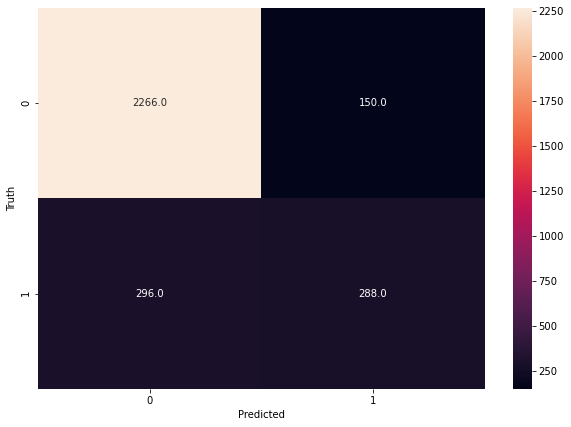

In [53]:
#Plotting confusion matrix
from sklearn.metrics import confusion_matrix
confuse_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(confuse_matrix, annot=True,fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(0, 0.5, 'Features')

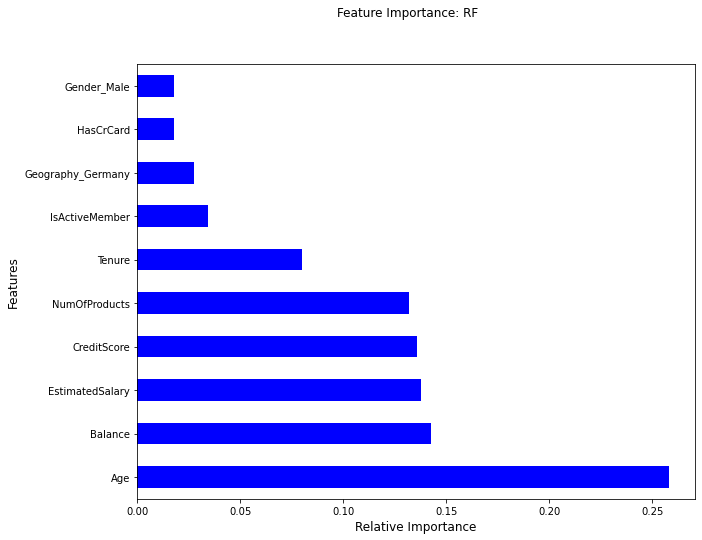

In [61]:
#Plotting feature importance
fig = plt.figure(figsize=(10,8))
feat_importances = pd.Series(model_rf.feature_importances_, index=X_features.columns)
feat_importances.nlargest(10).plot(kind='barh', color='b')
fig.suptitle('Feature Importance: RF', fontsize=12)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

### Conclusions and Recommendations
As we can see that the customers' age followed by balance, estimate salary, number of products, credit score, and tenure could be tremendously critical in order to predict customer churn rate in an European bank. The model
results indicated that utilization of machine learning models could be critical in prioritization of
several features of customers, importantly, balance and age in order to prevent bank churn rate. 
In summary,implementation of this machine learning model could be very useful to predict bank churn rate to make data-driven decision making in a bank. The model could be utilized to predict existing customers' churn rate and predict new customer how likely they will be retained. Finally, once the model is in production, continuous monitoring of the model metrics needs to be performed in order to make sure the model is robust in relation to potential addition of the revenue to the company. 